**Dix Hospital Ledger descriptive analysis** <br>
Updated: 18-Sep-2019


# Import Data

In [35]:
//	Import data, recevied 16-Sep-2019 from Sarah Almond

	import delimited "/Users/nabarun/Documents/GitHub/DixLedgerDataCleaning/Dix Ledger Deidentified.csv", clear

	describe, f


(29 vars, 7,479 obs)


Contains data
  obs:         7,479                          
 vars:            29                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
patientid       int     %8.0g                 Patient ID
patientnumberext
                str1    %9s                   Patient Number Ext
locatedin       int     %8.0g                 Located In
occupationastranscribed
                str39   %39s      

# Variable Cleanup and Formatting

## Age




(8 real changes made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)


age: all characters numeric; replaced as double
(248 missing values generated)

(bin=18, start=0, width=5)


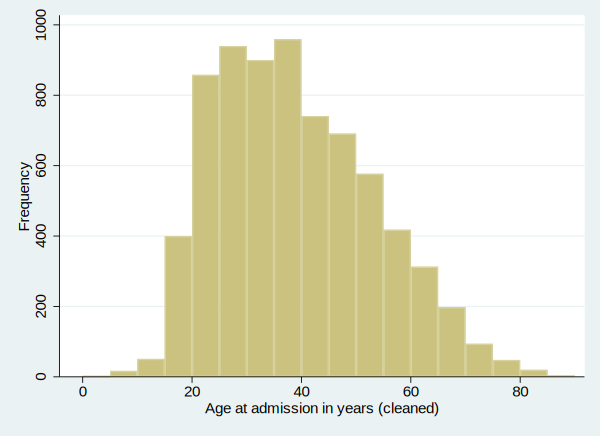

In [36]:
// Age at admission (string)
	qui: tab age, m sort
	la var age "Age at admission in years (cleaned)"

	* missing
	replace age="" if regexm(lower(age),"unk")
		replace age="" if age=="?"

	* pick median of literal age ranges
	replace age = "33" if age=="30-35?"
	replace age = "43" if age=="45 or 50"
	replace age = "43" if age=="45-50"
	replace age = "45" if age=="4_"
	replace age = "58" if age=="55 or 60"
	replace age = "73" if age=="70-5"

	* fraction to decimal and trim extra characters
	replace age = regexr(age," 1/2", ".5")
	replace age = regexr(age,"\+", "")
	replace age = regexr(age,"(\?)", "")

	replace age = "35" if age=="About 35"
	replace age = "58" if age=="58 ()"

	qui: tab age, m sort

	* convert to numeric
	destring age, replace
	hist age, width(5) freq

//	Age of first attack (string)

## Marital Status

In [37]:
gen marital = .
	replace marital = 1 if maritalstatus=="Single"
	replace marital = 2 if maritalstatus=="Married"
	replace marital = 2 if maritalstatus=="Single;Married"
	replace marital = 3 if maritalstatus=="Widowed"
	replace marital = 3 if maritalstatus=="Married; Widowed"
	replace marital = 4 if maritalstatus=="Divorced"
	replace marital = 4 if maritalstatus=="Separated"
	replace marital = 9 if maritalstatus==""
	replace marital = 9 if maritalstatus=="unknown"
    replace marital = 9 if marital==.
		la var marital "Marital status at admission (recoded)"
			label define marlabel 1 "Single" 2 "Married" 3 "Widowed" 4 "Separated or Divorced" 9 "Unknown"
				label values marital marlabel
					tab marital, m


(7,479 missing values generated)

(3,224 real changes made)

(3,380 real changes made)

(0 real changes made)

(678 real changes made)

(7 real changes made)

(4 real changes made)

(1 real change made)

(181 real changes made)

(0 real changes made)

(4 real changes made)





    Marital status at |
  admission (recoded) |      Freq.     Percent        Cum.
----------------------+-----------------------------------
               Single |      3,224       43.11       43.11
              Married |      3,380       45.19       88.30
              Widowed |        685        9.16       97.46
Separated or Divorced |          5        0.07       97.53
              Unknown |        185        2.47      100.00
----------------------+-----------------------------------
                Total |      7,479      100.00


## Final Disposition

In [38]:
// SECTION IN PROGRESS

* Flag for death
	gen dead = regexm(lower(finalcondition),"die|dead")
		order dead, b(finalcondition)
			la var dead "Infer dead=1 from free text"
                tab dead, m
            
* Flag for better as improved or cured
	gen better = regexm(lower(finalcondition),"cure")
		order better, b(finalcondition)
            la var better ""
                tab better, m
        
* Transferred to other facilities
	gen transfer = regexm(lower(remarksfreetext),"w.n.c|western|transf|sent")
        la var transfer "Infered flag for transfer=1 in free text"
            tab transfer, m

* Suicide flag
	gen suicide = regexm(lower(remarksfreetext), "suicide")
        la var suicide "Infered flag for suicide=1 in free text"
            tab suicide, m
        
* Pellagra flag
	gen pellagra = regexm(lower(remarksfreetext), "pellagra")
        la var pellagra "Infered flag for pellagra=1 in free text"
            tab pellagra, m






      Infer |
dead=1 from |
  free text |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      5,778       77.26       77.26
          1 |      1,701       22.74      100.00
------------+-----------------------------------
      Total |      7,479      100.00





     better |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      4,586       61.32       61.32
          1 |      2,893       38.68      100.00
------------+-----------------------------------
      Total |      7,479      100.00




    Infered |
   flag for |
 transfer=1 |
    in free |
       text |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      7,098       94.91       94.91
          1 |        381        5.09      100.00
------------+-----------------------------------
      Total |      7,479      100.00




    Infered |
   flag for |
  suicide=1 |
    in fre